In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.transforms as mtransforms

colores = []
for name, color in mcolors.TABLEAU_COLORS.items():
    colores.append(name[4:])

# Variables

In [5]:
input_files = '../output/CALIBRATION'
experiment = 'FRED_11001_calibration_asymp_1.00_fm_0.73_ksus_10.00_var_0_vax_070_mov_cal_test_1_out'

# Load info

In [6]:
df_data = pd.read_csv(f'{input_files}/{experiment}/fred_output.csv', low_memory=False)

In [7]:
df_params = pd.read_csv(f'{input_files}/{experiment}/FRED_parameters_out.csv', low_memory=False)

In [8]:
df_true_deaths = pd.read_csv(f'{input_files}/{experiment}/COL_covid_death_data.csv', low_memory=False)

# Plot info

In [117]:
LL_variable = 'LL_deaths'
selected_jobs = df_params.sort_values(by=LL_variable)['job_id'].tolist()[:12]

In [118]:
df_ = df_data[df_data.job_id.isin(selected_jobs)]

In [119]:
# df_true_deaths['Date'] = pd.to_datetime(df_true_deaths['Date'])
# df_true_deaths.set_index('Date', inplace=True)

# date_range = pd.date_range(start='2020-01-01', end=df_true_deaths.index.max(), freq='D')
# resampled_df = pd.DataFrame(index=date_range, columns=df_true_deaths.columns)
# resampled_df.update(df_true_deaths)
# resampled_df.fillna(0, inplace=True)

In [120]:
# fig, ax = plt.subplots()
# fig.set_size_inches(w=17, h=7)

# for job_ in df_.job_id.unique():
#     df_[df_.job_id == job_][['Day', 'CF_mean']].set_index('Day').plot(ax=ax)

# ax.scatter(np.arange(0, 450, 1), resampled_df.Deaths.to_list()[:450])

In [121]:
starting_date = pd.to_datetime('2020-01-01')
date_list = starting_date + pd.to_timedelta(df_.Day.unique() - 1, unit='D')

In [122]:
# df_[['job_id', 'Day', 'CF_mean']]

In [123]:
agg_funcs = {
    'CF_mean': ['median', 
              lambda x: x.quantile(0.05), 
              lambda x: x.quantile(0.95)]
}

result = df_[['Day', 'job_id', 'CF_mean']].groupby('Day').agg(agg_funcs)
result.columns = ['median_', 'low_quantile', 'high_quantile']

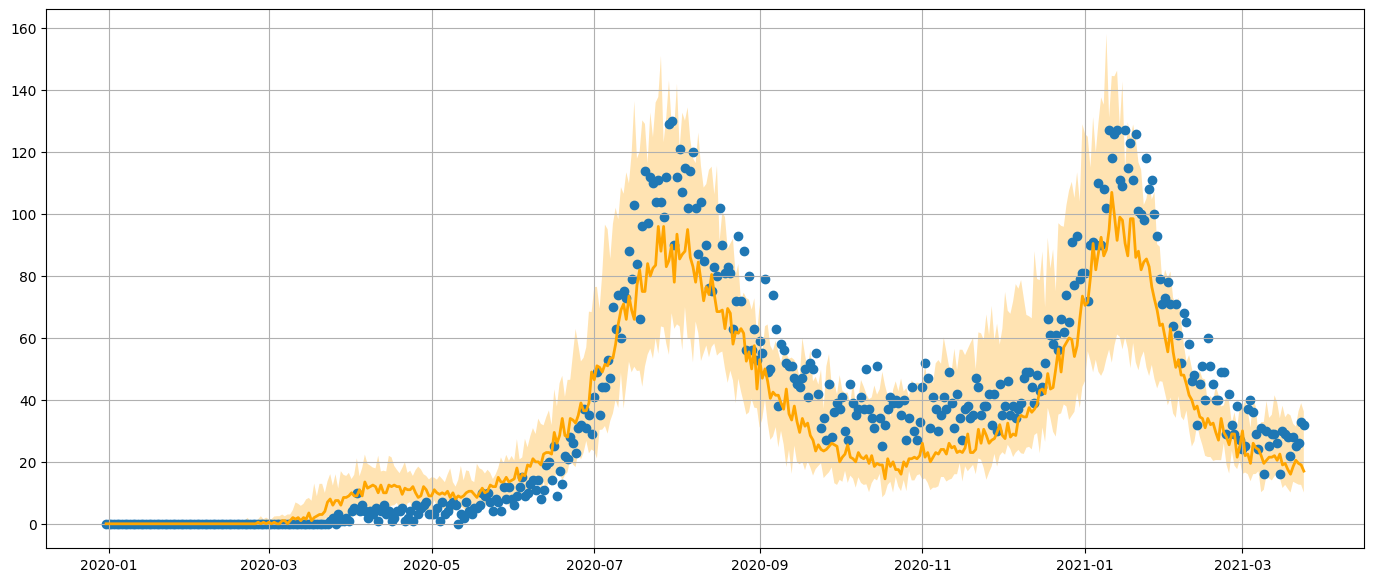

In [125]:
fig, ax = plt.subplots()
fig.set_size_inches(w=17, h=7)

p3 = ax.plot(date_list, result.median_,  alpha = 1, zorder = 2, color = colores[1], linewidth = 2)
ax.fill_between(date_list, result.low_quantile, result.high_quantile, where=result.high_quantile >= result.low_quantile, facecolor=colores[1], interpolate=True, alpha = 0.3)

ax.scatter(date_list, resampled_df.Deaths.to_list()[:450])
ax.grid()